<a href="https://colab.research.google.com/github/project-ida/two-state-quantum-systems/blob/master/03-a-two-state-system-in-a-quantised-field.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <a href="https://nbviewer.jupyter.org/github/project-ida/two-state-quantum-systems/blob/master/03-a-two-state-system-in-a-quantised-field.ipynb" target="_parent"><img src="https://nbviewer.jupyter.org/static/img/nav_logo.svg" alt="Open In nbviewer" width="100"/></a>

# 3 - A two state system in a quantised field

In [44]:
# Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from qutip import *
import warnings
warnings.filterwarnings('ignore')

## 3.1 - Recap

In [45]:
plus = basis(2, 0)
minus = basis(2, 1)

## 3.2 - What is a quantum field?

In [46]:
two = basis(5, 2)
two

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]]

In [47]:
a = destroy(5)      # We choose 5 so that we can operate on states with up to a maximum of n=4 bosons
a_dag = create(5)   # we could also use a.dag()

In [48]:
(a_dag*two).unit()

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]]

In [49]:
(a*two).unit()

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]]

## 3.3 - The Hamiltonian for a quantum field

We have seen that to describe a quantum field we need to construct a Hamiltonian of the form:

$$
H = \underset{k}{\sum} \hbar\omega_k\left(a_k^{\dagger}a_k +\frac{1}{2}\right)
$$

where the sum is over all the possible modes of the field and $a_k^{\dagger}$ and $a_k$ operators create and destroy bosons in the k'th mode.

Let's continue to consider
- only a single mode
- maximum of 4 bosons in that mode

For simplicity we'll set the energy of the mode $\omega$ = 1 (recall $\hbar=1$ in QuTiP)

In [50]:
omega = 1
max_bosons = 4

a = destroy(max_bosons+1)

H = omega*(a.dag()*a+0.5)

Let's have a look at H

In [51]:
H

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0.5 0.  0.  0.  0. ]
 [0.  1.5 0.  0.  0. ]
 [0.  0.  2.5 0.  0. ]
 [0.  0.  0.  3.5 0. ]
 [0.  0.  0.  0.  4.5]]

Because the Hamiltonian is diagonal there is no coupling between the different number states. Without doing any further calculation we can therefore say that if we start out with e.g. 3 bosons in our mode then we'll continue to have 3 bosons indefinitely. This is the same type of behaviour that we saw in the isolated two state system ([tutorial 01](https://github.com/project-ida/two-state-quantum-systems/blob/master/01-an-isolated-two-state-system.ipynb) section 1.1). - Not very exciting!

We do however expect that bosons will get created and destroyed as a result of interaction with another system, e.g. when an electron makes a transition between different energy levels. Let's see how we can model that - this will end up giving us the spontaneous emission physics that we so far been lacking.

## 3.4 - Coupling to a quantum field

## 3.5 - Describing coupled systems in QuTiP

Right now, we represent the two state system by something like

$$
|+> = \begin{bmatrix}
 1   \\
 0   \\
 \end{bmatrix}
$$

and the field is represented by something like

$$
|2> = \begin{bmatrix}
 0   \\
 0   \\
 1   \\
 0   \\
 \end{bmatrix}
$$

These states clearly have different dimensions and so too do the operators in H above - we cannot simply multiply together them as our Hamiltonian would suggest. We need a new basis that is somehow a combination of the existing ones.



One way to build a new basis is to enumerate the many different configurations for the combined system, e.g.
- 2 bosons for the field and + for the two-state system, i.e. |2, ->
- 0 bosons for the field and - for the two-state system, i.e |0, +>
- etc.

There are `(max_bosons+1) x 2` different states and we can write the probability for the system to be in those states as entries in a vector like below.

$$ |n,\pm>  = 
\begin{bmatrix}
 0,+    \\
 0,-   \\
 1,+    \\
 1,-   \\
 2,+    \\
 2,-   \\
 3,+    \\
 3,-   \\
 4,+    \\
 4,-   \\
  \vdots 
\end{bmatrix} \ , \ \ \ \  \ \ \  \ \ 
|2, ->  = 
\begin{bmatrix}
 0    \\
 0   \\
 0    \\
 0   \\
 0    \\
 1   \\
 0    \\
 0   \\
 0    \\
 0   \\
  \vdots 
\end{bmatrix}
$$


QuTiP automates the process of creating these states using [tensor products](http://qutip.org/docs/latest/guide/guide-tensor.html#using-tensor-products-and-partial-traces), which calculates, e.g.

$$
|2,-> = |2> \otimes |->
$$

In [52]:
two_minus = tensor(two, minus) # The order here doesn't matter, but you need to be consistent throughout
two_minus

Quantum object: dims = [[5, 2], [1, 1]], shape = (10, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]

> As an aside (feel free to skip this paragraph), for those who are know a bit more about the formal mathematics of the [tensor product](https://en.wikipedia.org/wiki/Tensor_product) (see also [outer product](https://en.wikipedia.org/wiki/Outer_product) ), you might be surprised that the result of `tensor(two, plus)` is a vector and not a matrix. Technically what is being done here is the [Kronecker product](https://en.wikipedia.org/wiki/Kronecker_product) and to see the explicit connection between the matrix an vector form  see [here](https://en.wikipedia.org/wiki/Outer_product#Connection_with_the_Kronecker_product).

The same tensor products can be done for [operators, creating block matrices](https://en.wikipedia.org/wiki/Tensor_product#Tensor_product_of_linear_maps) e.g.

$$
I(5) \otimes \sigma_z =
\begin{bmatrix}
 1 & 0 & 0 & 0 & 0   \\
 0 & 1 & 0 & 0 & 0   \\
 0 & 0 & 1 & 0 & 0   \\
 0 & 0 & 0 & 1 & 0   \\
 0 & 0 & 0 & 0 & 1   \\
 \end{bmatrix} \otimes
 \begin{bmatrix}
 1 & 0   \\
 0 & -1  \\
\end{bmatrix} = 
 \begin{bmatrix}
 1\times\sigma_z & 0\times\sigma_z & 0\times\sigma_z & 0\times\sigma_z & 0\times\sigma_z   \\
 0\times\sigma_z & 1\times\sigma_z & 0\times\sigma_z & 0\times\sigma_z & 0\times\sigma_z   \\
 0\times\sigma_z & 0\times\sigma_z & 1\times\sigma_z & 0\times\sigma_z & 0\times\sigma_z   \\
 0\times\sigma_z & 0\times\sigma_z & 0\times\sigma_z & 1\times\sigma_z & 0\times\sigma_z   \\
 0\times\sigma_z & 0\times\sigma_z & 0\times\sigma_z & 0\times\sigma_z & 1\times\sigma_z   \\
\end{bmatrix}
$$ 

In [53]:
eye_sigmaz = tensor(qeye(5), sigmaz())
eye_sigmaz

Quantum object: dims = [[5, 2], [5, 2]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.]]

What's useful about this unwieldy tensorised $\sigma_z$ operator is that it only acts on the two-state part and leaves the field part unchanged - this is because we put the identity operator first.

In [54]:
eye_sigmaz * two_minus

Quantum object: dims = [[5, 2], [1, 1]], shape = (10, 1), type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [-1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

We see above that we still have the 2 bosons we started with.

What will happen if we put the identity operator second and put the field operator $a$ first, i.e.

$$a \otimes I(2)$$

and then apply it to the state |2,->?

In [55]:
a_eye = tensor(a, qeye(2))

In [56]:
(a_eye * two_minus).unit()

Quantum object: dims = [[5, 2], [1, 1]], shape = (10, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

The boson number has gone down by one, but the two state system is still in the lower "-" state.

We've finally got everything we need to explore what the title of this tutorial promised, namely explore **"A two state system in a quantised field"**.

## 3.6 - Spontaneous emission

Let's remind ourselves of the Hamiltonian that we're working with:

$$H =  A \sigma_z + \hbar\omega\left(a^{\dagger}a +\frac{1}{2}\right) + V\left( a^{\dagger} + a \right)\sigma_x$$

Just like in our last couple of tutorials we'll use $A=0.1$. 

Let's also assume the field couples to the two state system effectively so that $V = A$.

How does the resonance that we discovered last time i.e. when $\omega = \omega_0 \equiv 2A$ change now that the field is quantised.

In [139]:
V = 0.1
A = 0.1
omega = 2*A   #Remember: this is because the DeltaA is 2 times A (delta energy of the atom)
max_bosons = 4 # The bigger this number the more accuracte your simualations will be. I tried 20 and it was almost the same as 4

In [140]:
a  = tensor(destroy(max_bosons+1), qeye(2))     # tensorised boson destruction operator
sx = tensor(qeye(max_bosons+1), sigmax())       # tensorised sigma_x operator
sz = tensor(qeye(max_bosons+1),sigmaz())        # tensorised sigma_z operator

two_state     =  A*sz                      # two state system energy
bosons       =  omega*(a.dag()*a+0.5)      # bosons field energy
interaction   = V*(a.dag() + a) * sx       # interaction energy

H = two_state + bosons + interaction
H

Quantum object: dims = [[5, 2], [5, 2]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[0.2        0.         0.         0.1        0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.1        0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.1        0.4        0.         0.         0.14142136
  0.         0.         0.         0.        ]
 [0.1        0.         0.         0.2        0.14142136 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.14142136 0.6        0.
  0.         0.17320508 0.         0.        ]
 [0.         0.         0.14142136 0.         0.         0.4
  0.17320508 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.17320508
  0.8        0.         0.         0.2       ]
 [0.         0.         0.         0.         0.17320508 0.
  0.         0.6        0.2        0.        ]
 [0.         0.         0.   

Because we've got 10 possible states, the probability plots that we normally create are going to get a bit crowded. To make plots easier to understand, we'll create a function to label the simulation data according to $\pm$ notation that we've been using up to this point to describe the two state system.

In [141]:
def states_to_df(states,times):
    data = {}
    for i in range(0,states[0].shape[0]):
        which_mode = divmod(i,2)
        if which_mode[1] == 0:
            two_state = "+"
        elif which_mode[1] == 1:
            two_state = "-"
        data[str(which_mode[0])+" , "+two_state] = np.zeros(len(times),dtype="complex128")
    
    for i, state in enumerate(states):
        for j, psi in enumerate(state):
            which_mode = divmod(j,2)
            if which_mode[1] == 0:
                two_state = "+"
            elif which_mode[1] == 1:
                two_state = "-"
            data[str(which_mode[0])+" , "+two_state][i] = psi[0][0]

    return pd.DataFrame(data=data, index=times)

The quintessential set-up for spontaneous emission is to have the field empty, i.e. no bosons $n=0$, and the two state system in it's "excited" (aka higher energy "+") state.

Let's see what happens.

In [142]:
psi0 = tensor(basis(max_bosons+1, 0), basis(2, 0))  # No bosons and two-state system is in the higher energy + state

times = np.linspace(0.0, 70.0, 1000)      # simulation time

result = sesolve(H, psi0, times)
df_coupled =  states_to_df(result.states, times)

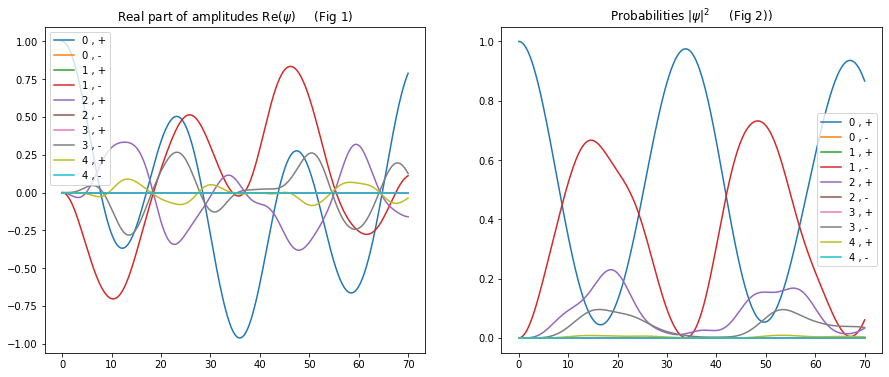

In [143]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
df_coupled.plot(title="Real part of amplitudes Re($\psi$)     (Fig 1)", ax=axes[0]);
(df_coupled.abs()**2).plot(title="Probabilities $|\psi|^2$     (Fig 2))", ax=axes[1]);

## Let's try now to start from an eigenstate
(and see the components relative to the eigenstates without coupling)


In [144]:
evals, ekets = H.eigenstates()
evals

array([-0.02665771,  0.07601512,  0.23966406,  0.26529669,  0.42525869,
        0.49497179,  0.66520102,  0.7402742 ,  1.02682084,  1.09315531])

In [152]:
ekets[0]

Quantum object: dims = [[5, 2], [1, 1]], shape = (10, 1), type = ket
Qobj data =
[[ 0.        ]
 [-0.96180816]
 [ 0.25639601]
 [ 0.        ]
 [ 0.        ]
 [-0.09342663]
 [ 0.02079222]
 [ 0.        ]
 [ 0.        ]
 [-0.00503043]]

In [157]:
psix = tensor(basis(max_bosons+1, 0), basis(2, 0))
expect(H,psix)

0.2

In [160]:
psi0.dag()*ekets[1]

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.60845174]]